# <center>**<ins>Sujet d'Examen :</ins> Chaîne de masse-ressort**</center>

___

###### [Robin Combes, Mono 1-A]

## <ins>Objectif :</ins>

On souhaite modéliser puis caractériser le comportement d'une chaîne de masse-ressort en réponse à l'application d'une certaine force sur l'un des éléments de cette chaîne.

## <ins>Cadre de la modélisation :</ins>

* On se place dans le référentiel terrestre supposé galiléen, munit du repère cartésien $\mathrm{(O,\vec{e_x},\vec{e_y},\vec{e_z})}$
* On considère une situation unidimensionnelle où tous les vecteurs considérés seront portés par l'axe $\mathrm{(Ox)}$ choisit arbitrairement (dans ce qui suit on n'évoquera donc plus que les normes de ces vecteurs sous-entendu dirigés selon l'axe $\mathrm{(Ox)}$)
###### [Les considérations suivantes sont exactement celles énoncées dans le sujet d'Examen]
* On considère une chaîne de $\mathrm{N+2}$ masses $\mathrm{m}$ numérotées de $0$ à $\mathrm{N+1}$ et reliées entre elles par des ressorts de raideur $\mathrm{k}$. Les masses $0$ et $\mathrm{N+1}$ sont maintenues fixes et on applique une force $\mathrm{F \cos(\omega t)}$, qui varie sinusoidalement en fonction du temps $\mathrm{t}$, sur la masse $\mathrm{N}$.
* Après un régime transitoire, le déplacement de la masse $\mathrm{n}$ par rapport à sa position d'équilibre est : $\,\mathrm{A_n \cos(\omega t)}$ où $\mathrm{A_n}$ est un réel positif ou négatif. <br>Ainsi, les déplacements des masses sont synchronisées, mais chaque déplacement a une amplitude $\mathrm{A_n}$ différente (ce deplacement peut même s'inverser (en opposition de phase) lorsque l'amplitude $\mathrm{A_n}$ est négative).
* Les amplitudes $\mathrm{A_n}$ des déplacements de chaque masse vérifient la relation de récurrence : 
$$\begin{equation}\left\{\begin{aligned}
\mathrm{A_0=0}\\
\mathrm{A_{N+1}=0}\\ 
\mathrm{-m.\omega^2.A_n\,=\,k.(A_{n+1}+A_{n-1}-2\,A_n)\,\,\,pour\,\,tout\,\,entier\,\,n\in[1,N-1]}\\
\mathrm{-m.\omega^2 A_N\,=\,k.(A_{N-1}-2\,A_N)+F}
\end{aligned}\right.\end{equation}$$
* On utilisera dans la suite $\mathrm{\sqrt{\frac{k}{m}}}$ comme unité pour les pulsations, $\mathrm{\frac{F}{k}}$ comme unité pour les amplitudes et on pose : $\mathrm{A_n = A.u_n}$ et $\mathrm{u_1=1}$
* Dès lors la suite $\mathrm{u_n}$ ainsi définie vérifie :
$$\begin{equation}\left\{\begin{aligned}
\mathrm{u_0=0}\\
\mathrm{u_1=1}\\
\mathrm{u_n=(2-\omega^2).u_{n-1}-u_{n-2}}
\end{aligned}\right.\end{equation}\,\,\,\,\,\,\mathrm{avec\,\,le\,\,facteur\,\,A\,\,donné\,\,par\,\,A=\frac{1}{(2-\omega^2)u_N-u_{N-1}}}$$

## <ins>Partie I :</ins>

Il s'agit dans un premier temps de montrer que le système de masse-ressort présente un phénomène de résonance pour certaines valeurs de la pulsation $\mathrm{\omega_r}$ de la force d'excitation $\mathrm{F}$. 

Le programme çi-dessous permet d'afficher les valeurs normalisées de la suite $\mathrm{u_n}$ en considérant le cas de 1002 masselottes constituant la chaîne et pour $\omega =\frac{\pi}{1000}$ :

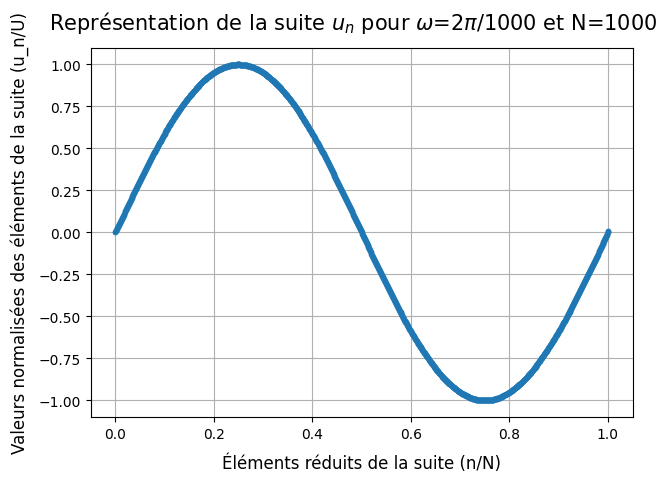

In [2]:
from matplotlib import pyplot as plt
import numpy as np
u_0=0
u_1=1
def affu(w,N):
    X=[i/1000 for i in range(N+2)]
    Y=[u_0,u_1]
    for i in range(2,len(X)):
        Y.append((2-w**2)*Y[i-1]-Y[i-2])
    Y=np.array(Y)
    Y/=max(Y)
    plt.figure(figsize=(7,4.8))
    plt.scatter(X,Y,s=10)
    plt.grid()
    plt.gca().set_axisbelow(True)
    plt.suptitle("Représentation de la suite $u_n$ pour $\omega$=2$\pi$/{} et N={}".format(N,N),fontsize=15, fontweight='light', horizontalalignment='center',y=0.96)
    plt.xlabel('Éléments réduits de la suite (n/N)',fontsize=12,labelpad=9)         #On définit la légende de l'axe des abscisses et ses paramètres
    plt.ylabel('Valeurs normalisées des éléments de la suite (u_n/U)',fontsize=12,labelpad=7) #Idem pour l'axe des ordonnées
    plt.show()

affu((2*np.pi)/1000,1000)

On constate par lecture graphique qu'on a bien $\mathrm{A_0=A.u_0=0}$ et $\mathrm{A_{1001}=A.u_{1001}=0}$ (on rapelle qu'ici N=1000) ; les conditions aux limites sont donc bien vérifiées.

Le programme çi-dessous permet d'afficher les valeurs du facteur $\mathrm{|A|}$ en fonction du paramètre $\mathrm{N \omega / \pi}$ :

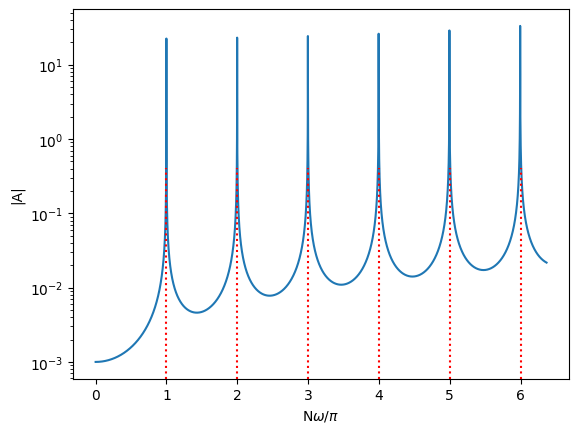

In [81]:
from matplotlib import pyplot as plt
import numpy as np
u_0=0
u_1=1
def fA(w,N):
    X=[i for i in range(N+2)]
    Y=[u_0,u_1]
    for i in range(2,len(X)):
        Y.append((2-w**2)*Y[i-1]-Y[i-2])
    A=1/((2-w**2)*Y[N]-Y[N-1])
    return abs(A)

def affA(N,n):
    iw=[0,20/N]
    x=np.linspace(iw[0],iw[1],n)
    y=fA(x,N)
    x*=N/np.pi
    plt.plot(x,y)
    for i in range(1,7):
        plt.axvline(x=i,ymax=0.57, color='red',linestyle='dotted')
    plt.xlabel('N$\omega$/$\pi$')
    plt.ylabel('|A|')
    plt.yscale('log')
    plt.show()

affA(1000,10000)

On constate graphiquement que les raisonances semblent être atteintes pour des pulsations ayant pour valeur des multiples entiers non nuls de $\frac{\pi}{1000}$.

Faisons à présent varier le nombre de valeurs de $\omega$.

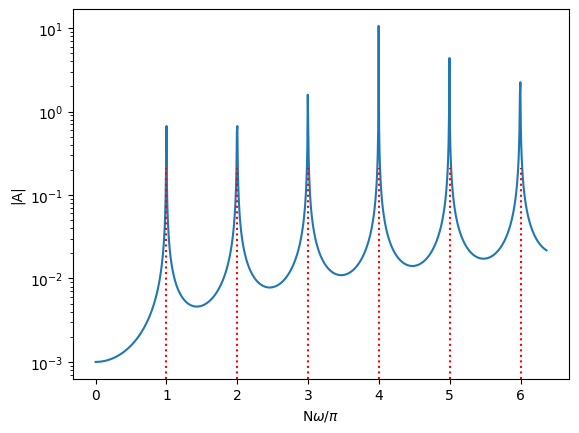

In [82]:
affA(1000,1000)

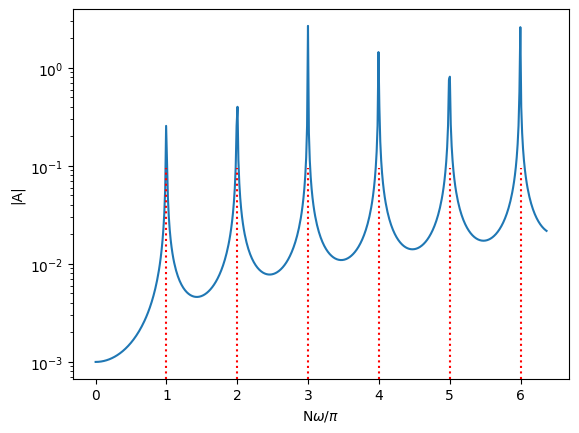

In [86]:
affA(1000,500)

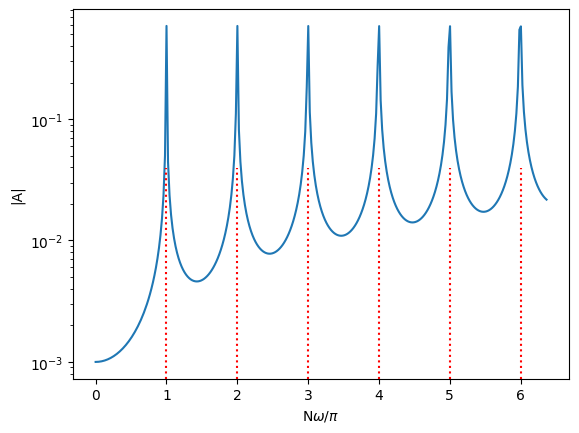

In [87]:
affA(1000,300)

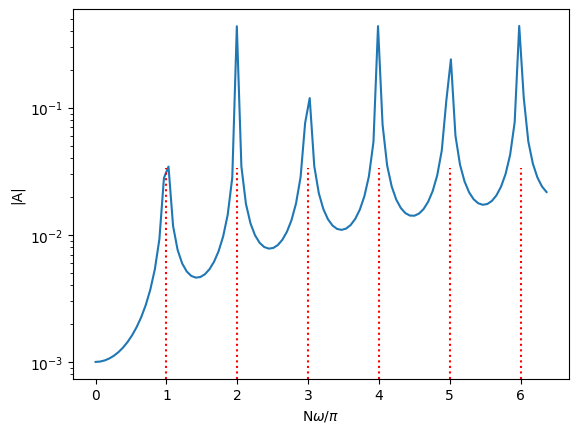

In [84]:
affA(1000,100)

On constate ainsi que malgré le fait que les valeurs de pulsations de résonance semblent inchangées, la résonance en elle même est de moins en moins piquée autour de ces valeurs de résonance.

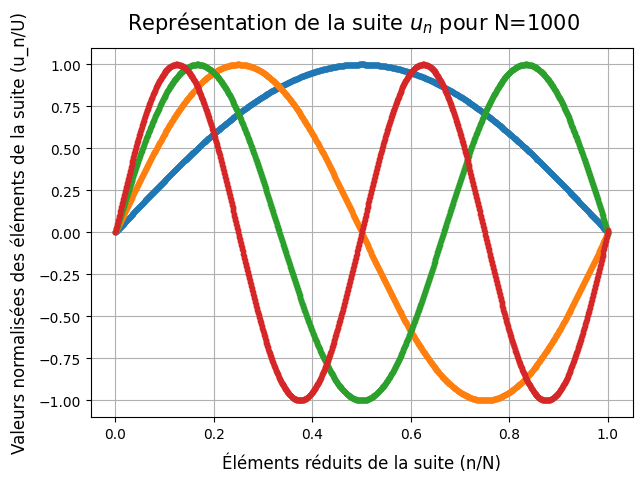

In [21]:
from matplotlib import pyplot as plt
import numpy as np
u_0=0
u_1=1
def affu(w,N):
    X=[i/1000 for i in range(N+2)]
    Y=[u_0,u_1]
    for i in range(2,len(X)):
        Y.append((2-w**2)*Y[i-1]-Y[i-2])
    Y=np.array(Y)
    Y/=max(Y)
    return (X,Y)

plt.figure(figsize=(7,4.8))
plt.scatter(affu((np.pi)/1000,1000)[0],affu((np.pi)/1000,1000)[1],s=10)
plt.scatter(affu((2*np.pi)/1000,1000)[0],affu((2*np.pi)/1000,1000)[1],s=10)
plt.scatter(affu((3*np.pi)/1000,1000)[0],affu((3*np.pi)/1000,1000)[1],s=10)
plt.scatter(affu((4*np.pi)/1000,1000)[0],affu((4*np.pi)/1000,1000)[1],s=10)
plt.grid()
plt.gca().set_axisbelow(True)
plt.suptitle("Représentation de la suite $u_n$ pour N=1000",fontsize=15, fontweight='light', horizontalalignment='center',y=0.96)
plt.xlabel('Éléments réduits de la suite (n/N)',fontsize=12,labelpad=9)         #On définit la légende de l'axe des abscisses et ses paramètres
plt.ylabel('Valeurs normalisées des éléments de la suite (u_n/U)',fontsize=12,labelpad=7) #Idem pour l'axe des ordonnées
plt.show()


On constate que les graphiques représentant les valeurs normalisées de la suite $\mathrm{u_n}$ pour les 4 premières valeurs de pulsation de résonance présentent tous une forme sinusoïdale périodique,  de périodes respectives $\mathrm{T_r=\frac{2\,\pi}{\omega_r}}$.
<br>On pourrait donc en effet envisager de les modéliser par une fonction sinusoïdale de la forme : $\mathrm{n}\longmapsto sin(\omega_r n)$

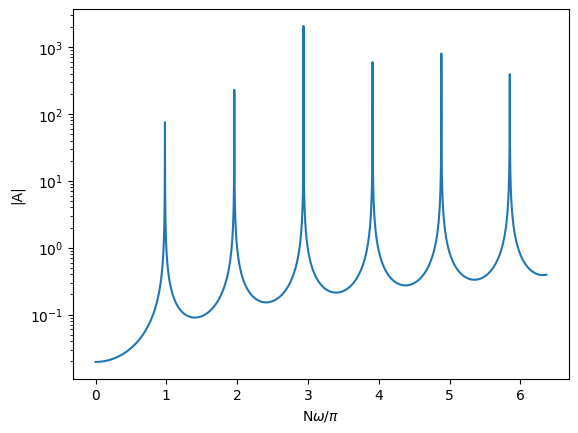

In [8]:
affA(50,10000)

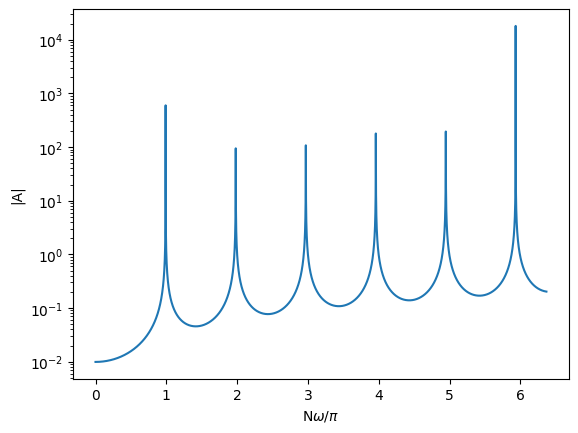

In [9]:
affA(100,10000)

Le cas pour N=10000 fait planter le kernel. 
CONCLUSION : pas de changement

## <ins>Partie II :</ins>

###### [Le texte suivant est issu du sujet d'examen]

Les masses de $0$ à $\mathrm{N/2}$ valent maintenant $\mathrm{m'=rm}$. La suite d'éléments $\mathrm{u_n}$ est donnée par :
$$\begin{equation}\left\{\begin{aligned}
\mathrm{u_0=0}\\
\mathrm{u_1=1}\\
\mathrm{u_n=(2-r\omega^2)u_{n-1}-u_{n-2}\,\,\,\,pour\,\,n\le N/2}\\
\mathrm{u_n=(2-\omega^2)u_{n-1}-u_{n-2}\,\,\,\,pour\,\,n\,>\,N/2}
\end{aligned}\right.\end{equation}$$
Le facteur $A$ est toujours donné par la même expression. On considèrera $\mathrm{N=1000}$ pour toute cette partie.

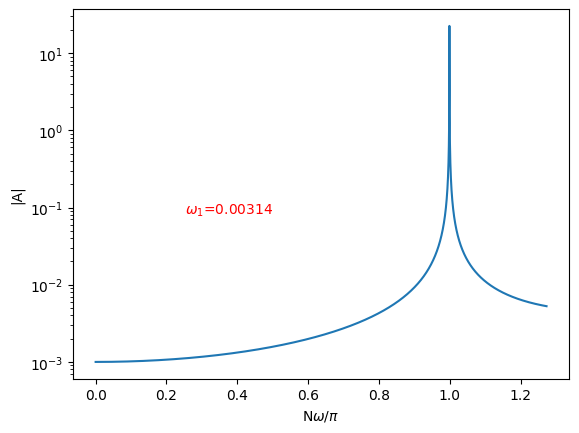

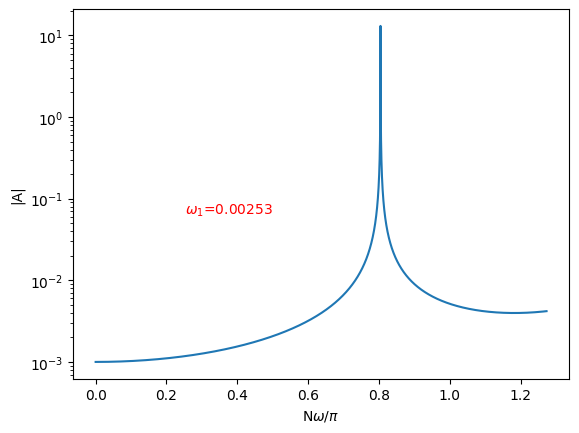

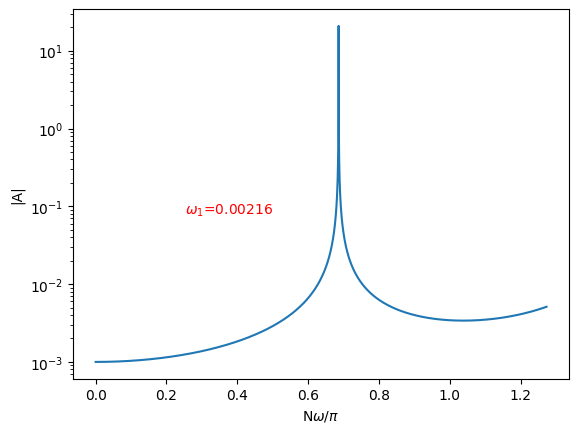

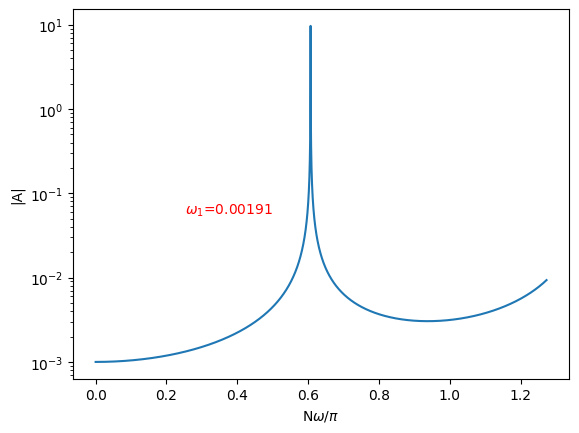

In [65]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks
u_0=0
u_1=1
def fA(w,r):
    X=[i for i in range(1002)]
    Y=[u_0,u_1]
    for i in range(2,503):
        Y.append((2-r*w**2)*Y[i-1]-Y[i-2])
    for j in range(503,1002):
        Y.append((2-w**2)*Y[j-1]-Y[j-2])
    A=1/((2-w**2)*Y[1000]-Y[999])
    return abs(A)

def affA(r,n):
    iw=[0,4/1000]
    x=np.linspace(iw[0],iw[1],n)
    y=fA(x,r)
    x*=1000/np.pi
    peaks, _ = find_peaks(y)
    plt.plot(x,y)
    plt.figtext(0.3,0.4529,"$\omega_1$="+str(round(x[peaks][0]*(np.pi/1000),5)),color='red')
    plt.xlabel('N$\omega$/$\pi$')
    plt.ylabel('|A|')
    plt.yscale('log')
    plt.show()

affA(1,10000)
affA(2,10000)
affA(3,10000)
affA(4,10000)

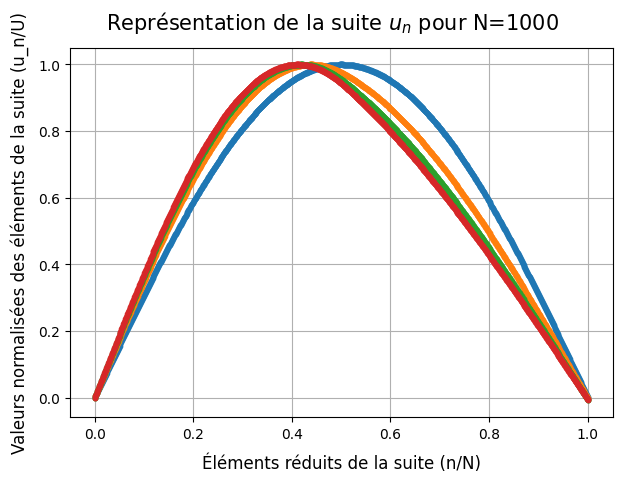

In [66]:
from matplotlib import pyplot as plt
import numpy as np
u_0=0
u_1=1

def affubis(w,r):
    X=[i/1000 for i in range(1002)]
    Y=[u_0,u_1]
    for i in range(2,503):
        Y.append((2-r*w**2)*Y[i-1]-Y[i-2])
    for j in range(503,1002):
        Y.append((2-w**2)*Y[j-1]-Y[j-2])
    Y=np.array(Y)
    Y/=max(Y)
    return (X,Y)

plt.figure(figsize=(7,4.8))
plt.scatter(affubis(0.00314,1)[0],affubis(0.00314,1)[1],s=10)
plt.scatter(affubis(0.00253,2)[0],affubis(0.00253,2)[1],s=10)
plt.scatter(affubis(0.00216,3)[0],affubis(0.00216,3)[1],s=10)
plt.scatter(affubis(0.00191,4)[0],affubis(0.00191,4)[1],s=10)
plt.grid()
plt.gca().set_axisbelow(True)
plt.suptitle("Représentation de la suite $u_n$ pour N=1000",fontsize=15, fontweight='light', horizontalalignment='center',y=0.96)
plt.xlabel('Éléments réduits de la suite (n/N)',fontsize=12,labelpad=9)         #On définit la légende de l'axe des abscisses et ses paramètres
plt.ylabel('Valeurs normalisées des éléments de la suite (u_n/U)',fontsize=12,labelpad=7) #Idem pour l'axe des ordonnées
plt.show()

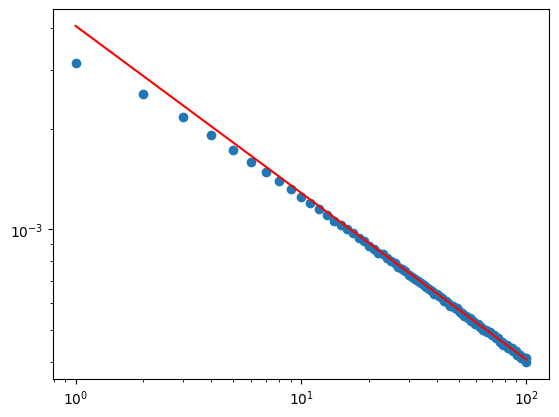

In [68]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import find_peaks
u_0=0
u_1=1
def fA(w,r):
    X=[i for i in range(1002)]
    Y=[u_0,u_1]
    for i in range(2,503):
        Y.append((2-r*w**2)*Y[i-1]-Y[i-2])
    for j in range(503,1002):
        Y.append((2-w**2)*Y[j-1]-Y[j-2])
    A=1/((2-w**2)*Y[1000]-Y[999])
    return abs(A)

def w1(r,n):
    iw=[0,4/1000]
    x=np.linspace(iw[0],iw[1],n)
    y=fA(x,r)
    x*=1000/np.pi
    peaks, _ = find_peaks(y)
    return round(x[peaks][0]*(np.pi/1000),5)
X=[i for i in range(1,101,1)]
Y1=[w1(i,10000) for i in range(1,101,1)]
Y2=[4.06/(1000*(i)**(1/2)) for i in range(1,101,1)]
plt.scatter(X,Y1)
plt.plot(X,Y2,color='red')
plt.xscale('log')
plt.yscale('log')
plt.show()

On constate que la relation donnée approxime en effet bien le tracé pour des grandes valeurs de r et N.